In [25]:
import pandas as pd
import numpy as np

electricity_bill_df = pd.read_csv('ElectricityBILL.csv')
print(electricity_bill_df.shape)


(1250, 16)


In [26]:
#splitting the data randomly into training(80%) and testing(20%) sets using sklearn
from sklearn.model_selection import train_test_split
trainSet, testSet = train_test_split(electricity_bill_df, test_size=0.2, random_state=42)
print(trainSet.shape, testSet.shape)

(1000, 16) (250, 16)


<Figure size 1000x800 with 0 Axes>

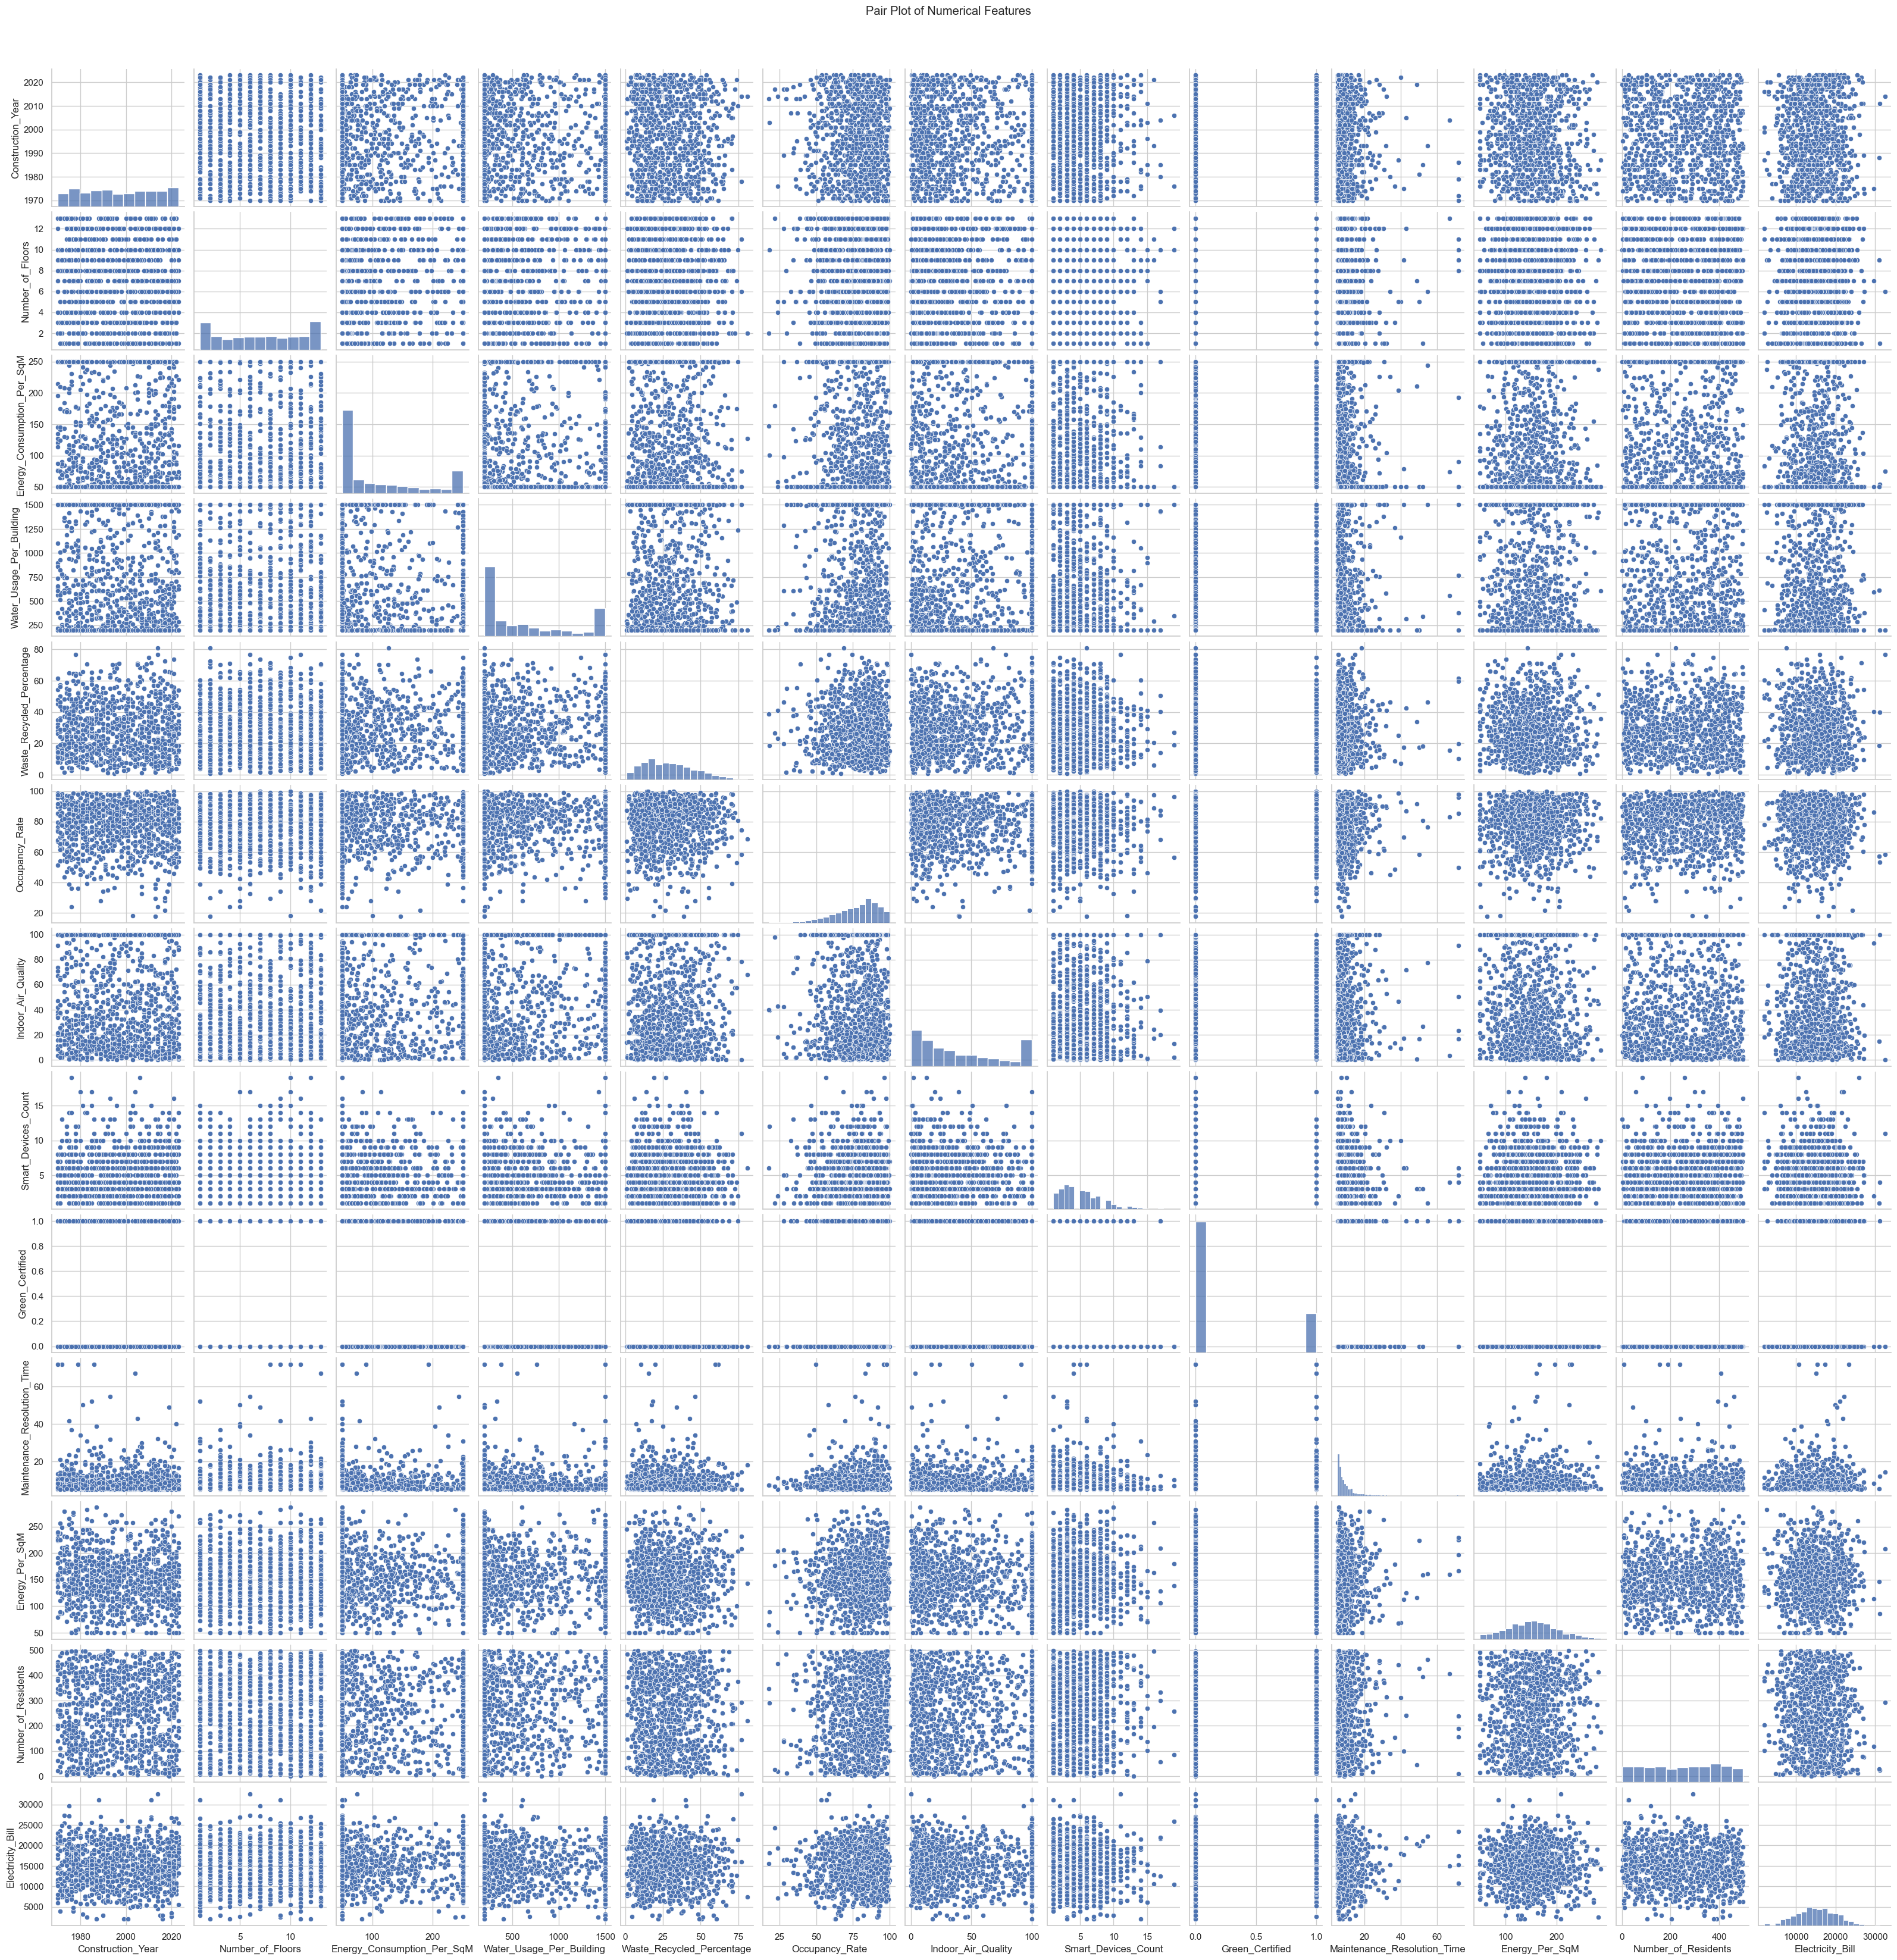

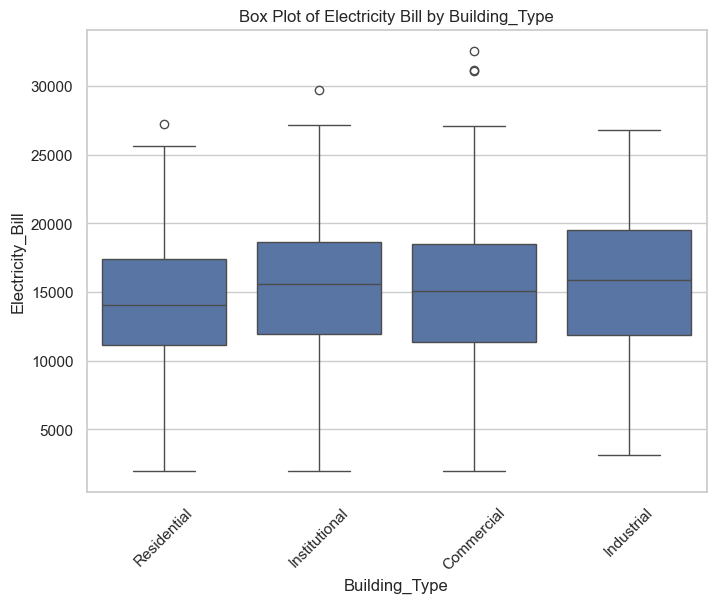

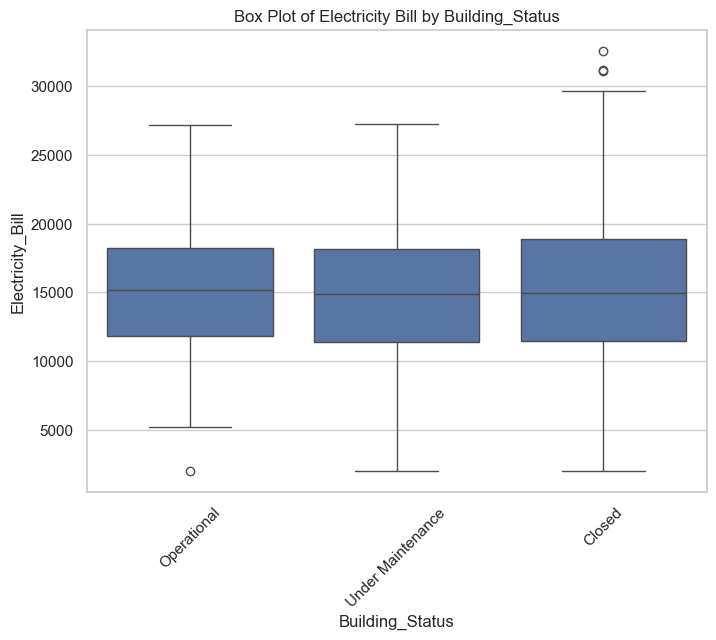

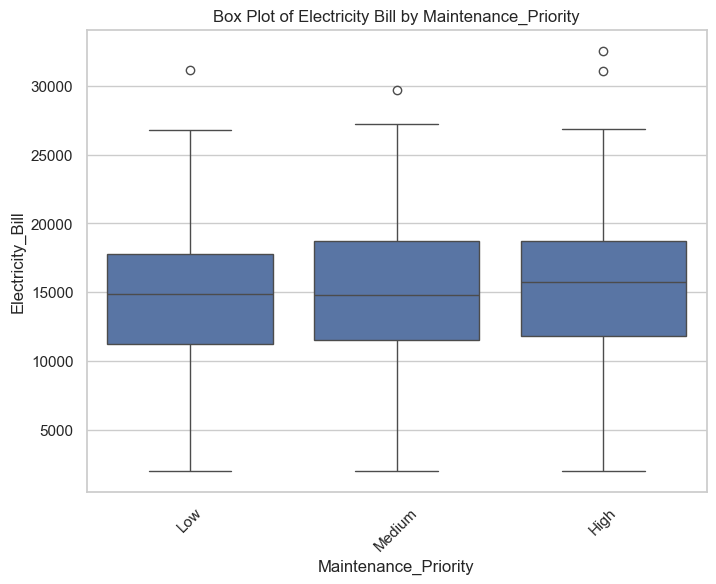

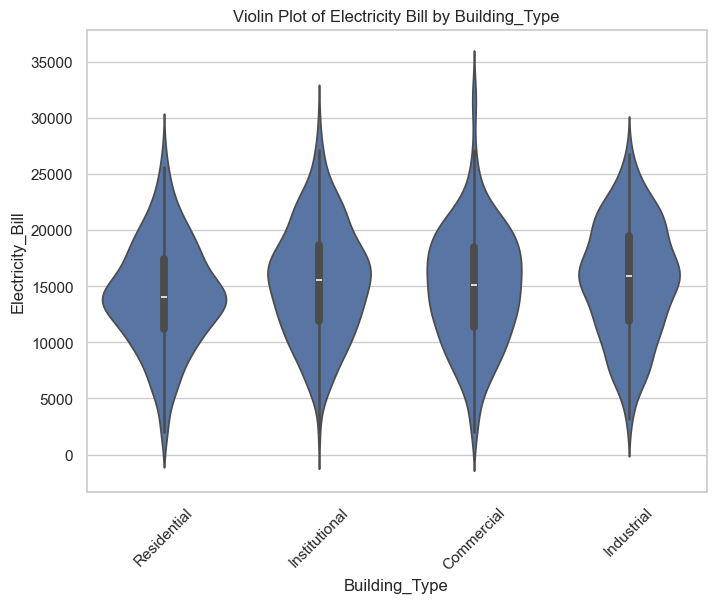

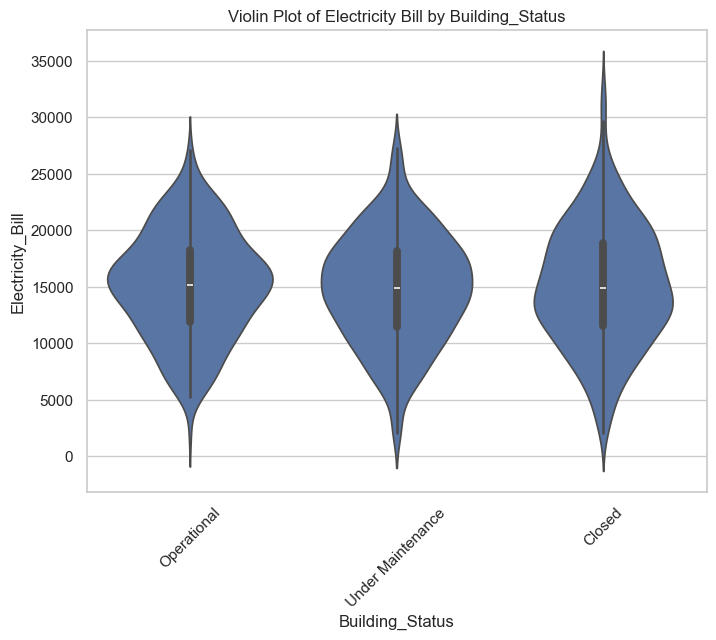

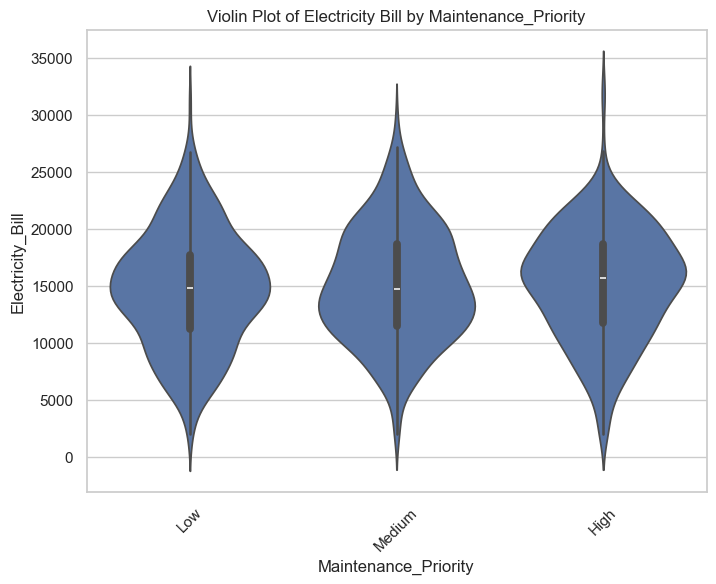

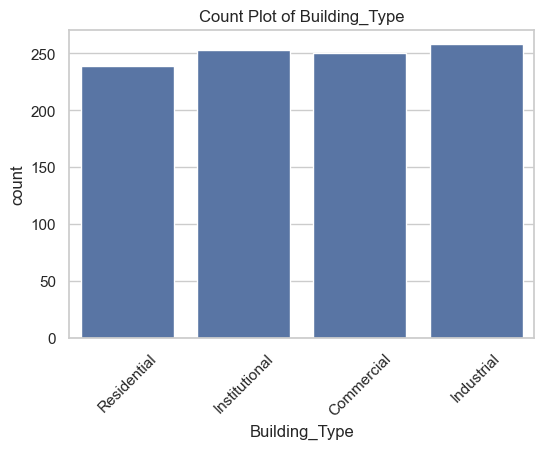

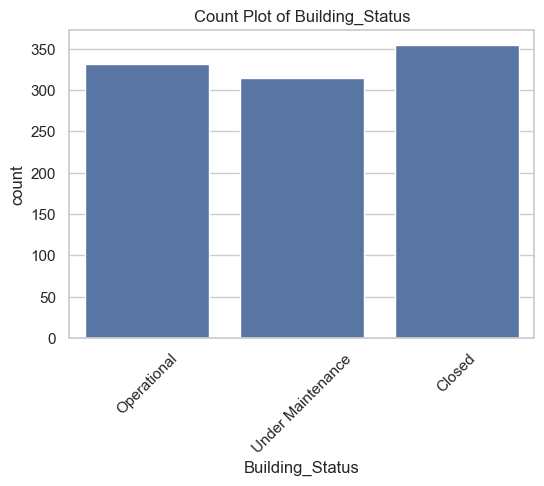

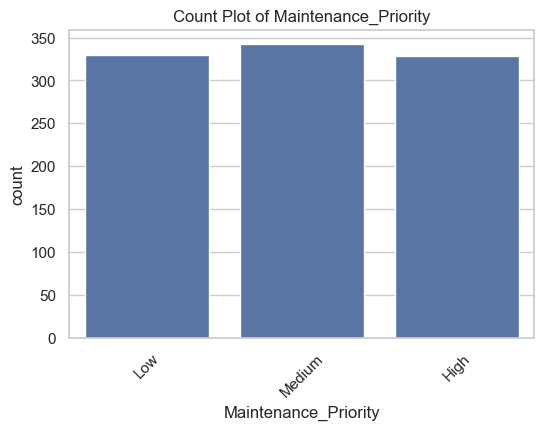

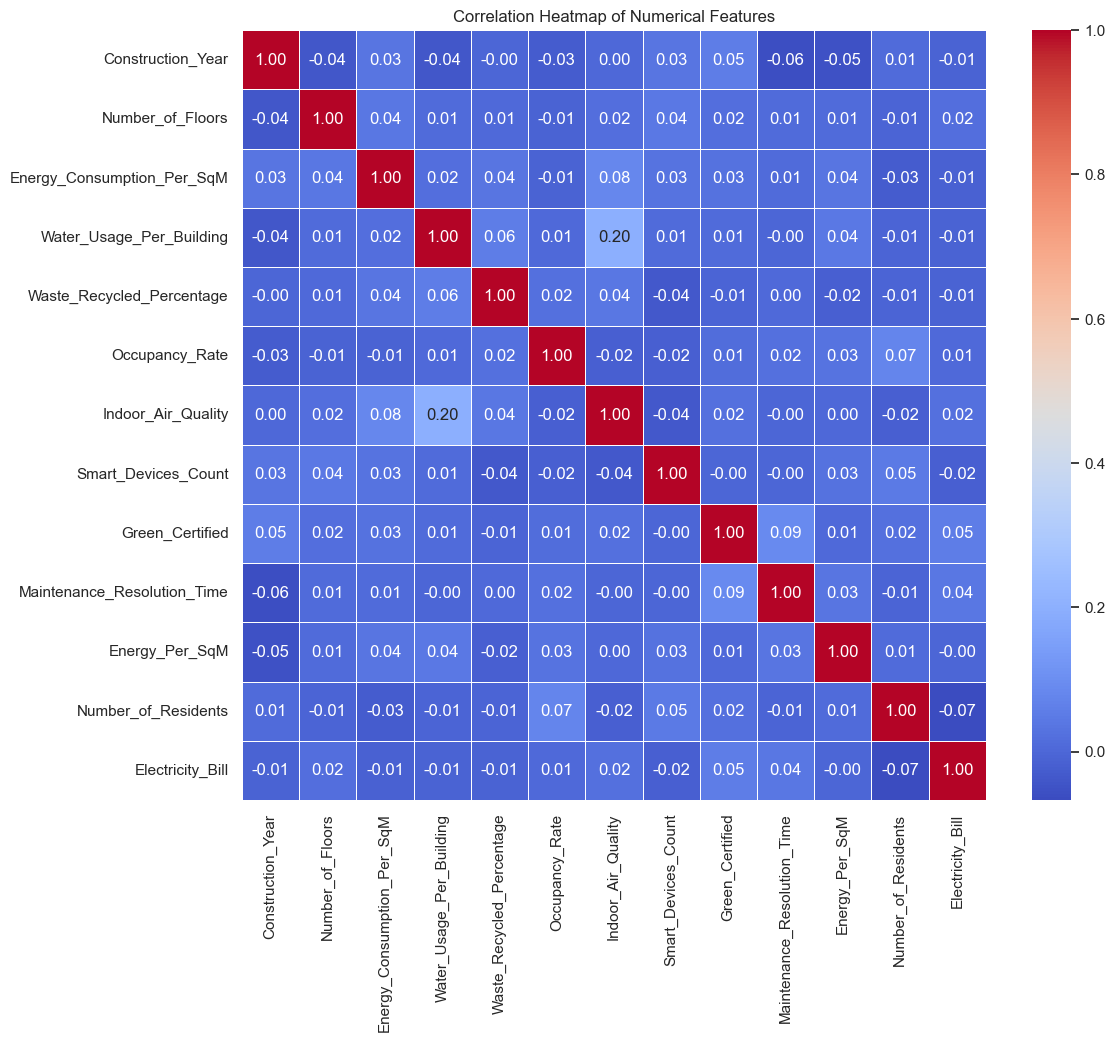

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a visual style
sns.set(style="whitegrid")

# Identify numerical and categorical features
numerical_features = trainSet.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = trainSet.select_dtypes(include=['object', 'category']).columns.tolist()

# (1) Pair plot for numerical features
plt.figure(figsize=(10, 8))
sns.pairplot(trainSet[numerical_features])
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

# (2) Box plot for 'Electricity_Bill' based on each categorical feature
for cat_feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=cat_feature, y='Electricity_Bill', data=trainSet)
    plt.xticks(rotation=45)
    plt.title(f"Box Plot of Electricity Bill by {cat_feature}")
    plt.show()

# (3) Violin plot for 'Electricity_Bill' based on each categorical feature
for cat_feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=cat_feature, y='Electricity_Bill', data=trainSet)
    plt.xticks(rotation=45)
    plt.title(f"Violin Plot of Electricity Bill by {cat_feature}")
    plt.show()

# (4) Count plot for each categorical feature
for cat_feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=cat_feature, data=trainSet)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {cat_feature}")
    plt.show()

# (5) Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = trainSet[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
electricity_bill_df['Building_Type'] = label_encoder.fit_transform(electricity_bill_df['Building_Type'])
electricity_bill_df['Building_Status'] = label_encoder.fit_transform(electricity_bill_df['Building_Status'])
electricity_bill_df['Maintenance_Priority'] = label_encoder.fit_transform(electricity_bill_df['Maintenance_Priority'])



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM', 
                  'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 
                  'Occupancy_Rate', 'Indoor_Air_Quality', 'Smart_Devices_Count', 
                  'Maintenance_Resolution_Time', 'Energy_Per_SqM', 'Number_of_Residents']
X = electricity_bill_df.drop(columns=['Electricity_Bill'])
y = electricity_bill_df['Electricity_Bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def adjusted_r2(r2, X):
    n = X.shape[0]
    p = X.shape[1]
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Train Data Metrics:\n"
      f"MSE: {mse_train}\nRMSE: {rmse_train}\nR2: {r2_train}\n"
      f"Adjusted R2: {adj_r2_train}\nMAE: {mae_train}\n")
print(f"Test Data Metrics:\n"
      f"MSE: {mse_test}\nRMSE: {rmse_test}\nR2: {r2_test}\n"
      f"Adjusted R2: {adj_r2_test}\nMAE: {mae_test}\n")

Train Data Metrics:
MSE: 24475013.16847547
RMSE: 4947.222773281538
R2: 0.013922520844610209
Adjusted R2: -0.0011091480449536562
MAE: 4006.3284693293604

Test Data Metrics:
MSE: 24278016.155742623
RMSE: 4927.272689403604
R2: 3.7344733075372893e-05
Adjusted R2: -0.0640628254763429
MAE: 3842.4093125585155



In [29]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X_train, y_train)
selected_features = X_train.columns[rfe.support_]
print("Selected Features using RFE:")
print(selected_features) 
X_train = X_train[selected_features]
X_test = X_test[selected_features]


model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Train Data Metrics:\n"
      f"MSE: {mse_train}\nRMSE: {rmse_train}\nR2: {r2_train}\n"
      f"Adjusted R2: {adj_r2_train}\nMAE: {mae_train}\n")
print(f"Test Data Metrics:\n"
      f"MSE: {mse_test}\nRMSE: {rmse_test}\nR2: {r2_test}\n"
      f"Adjusted R2: {adj_r2_test}\nMAE: {mae_test}\n")

Selected Features using RFE:
Index(['Building_Type', 'Green_Certified', 'Number_of_Residents'], dtype='object')
Train Data Metrics:
MSE: 24569032.90689799
RMSE: 4956.715939702212
R2: 0.010134545491283897
Adjusted R2: 0.007153023037944406
MAE: 4006.473377514736

Test Data Metrics:
MSE: 23941409.062998377
RMSE: 4892.995918964002
R2: 0.01390151386794114
Adjusted R2: 0.0018759225736477703
MAE: 3813.948128176773



In [30]:
import pandas as pd
data = pd.read_csv('ElectricityBILL.csv')



from sklearn.preprocessing import OneHotEncoder
import pandas as pd
categorical_features = ['Building_Type', 'Building_Status', 'Maintenance_Priority']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(data[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
data_encoded = pd.concat([data.drop(columns=categorical_features), encoded_df], axis=1)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Construction_Year', 'Number_of_Floors', 'Energy_Consumption_Per_SqM', 
                  'Water_Usage_Per_Building', 'Waste_Recycled_Percentage', 
                  'Occupancy_Rate', 'Indoor_Air_Quality', 'Smart_Devices_Count', 
                  'Maintenance_Resolution_Time', 'Energy_Per_SqM', 'Number_of_Residents']
X = data_encoded.drop(columns=['Electricity_Bill'])
y = data_encoded['Electricity_Bill']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])



from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
def adjusted_r2(r2, X):
    n = X.shape[0]
    p = X.shape[1]
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, X_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Train Data Metrics:\n"
      f"MSE: {mse_train}\nRMSE: {rmse_train}\nR2: {r2_train}\n"
      f"Adjusted R2: {adj_r2_train}\nMAE: {mae_train}\n")
print(f"Test Data Metrics:\n"
      f"MSE: {mse_test}\nRMSE: {rmse_test}\nR2: {r2_test}\n"
      f"Adjusted R2: {adj_r2_test}\nMAE: {mae_test}\n")

(1250, 16)
Train Data Metrics:
MSE: 24188936.964264195
RMSE: 4918.224981054059
R2: 0.02544828797507881
Adjusted R2: 0.006553918048065044
MAE: 3976.6800649807883

Test Data Metrics:
MSE: 24129021.297567267
RMSE: 4912.130016354135
R2: 0.006174143269100152
Adjusted R2: -0.07592451446084358
MAE: 3797.5706249191785



ICA applied with 4 components.


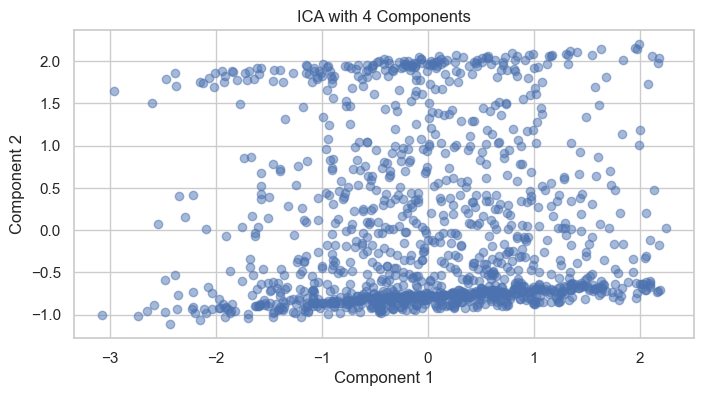

ICA applied with 5 components.


ICA applied with 6 components.


ICA applied with 8 components.


C:\Users\himan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [31]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Function to apply ICA with different components and plot the results
def apply_ica(X, n_components):
    ica = FastICA(n_components=n_components, random_state=42)
    X_transformed = ica.fit_transform(X)
    
    print(f"ICA applied with {n_components} components.")
    
    return X_transformed

# List of components to try
components_to_try = [4, 5, 6, 8]

# Iterate over each component count
for n_components in components_to_try:
    X_ica = apply_ica(X, n_components)
    
    # Plot the ICA components (for visualization)
    plt.figure(figsize=(8, 4))
    plt.scatter(X_ica[:, 0], X_ica[:, 1], alpha=0.5)
    plt.title(f'ICA with {n_components} Components')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()
